In [2]:
import pandas as pd
import numpy as np

# Comcast Telecom Consumer Complaints .

Project 3 

DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

Ticket #: Ticket number assigned to each complaint

Customer Complaint: Description of complaint

Date: Date of complaint

Time: Time of complaint

Received Via: Mode of communication of the complaint

City: Customer city

State: Customer state

Zipcode: Customer zip

Status: Status of complaint

Filing on behalf of someone

Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.

- Provide the trend chart for the number of complaints at monthly and daily granularity levels.

- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints

Which state has the highest percentage of unresolved complaints

- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

In [3]:
Comcast_df=pd.read_csv('Comcast_telecom_complaints_data.csv')

In [4]:
Comcast_df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [5]:
Comcast_df.nunique()

Ticket #                       2224
Customer Complaint             1841
Date                             91
Date_month_year                  91
Time                           2190
Received Via                      2
City                            928
State                            43
Zip code                       1543
Status                            4
Filing on Behalf of Someone       2
dtype: int64

In [6]:
Comcast_df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [7]:
Comcast_df['Date']=pd.to_datetime(Comcast_df['Date'])

In [8]:
Comcast_df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                        object
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

In [9]:
Comcast_df['month']=Comcast_df['Date'].apply(lambda x: x.strftime('%m'))

In [10]:
Comcast_df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,04
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,04
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,04
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,05
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,05
...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-04-02,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,04
2220,318775,Comcast Monthly Billing for Returned Modem,2015-06-02,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,06
2221,331188,complaint about comcast,2015-06-09,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,06
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,06


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

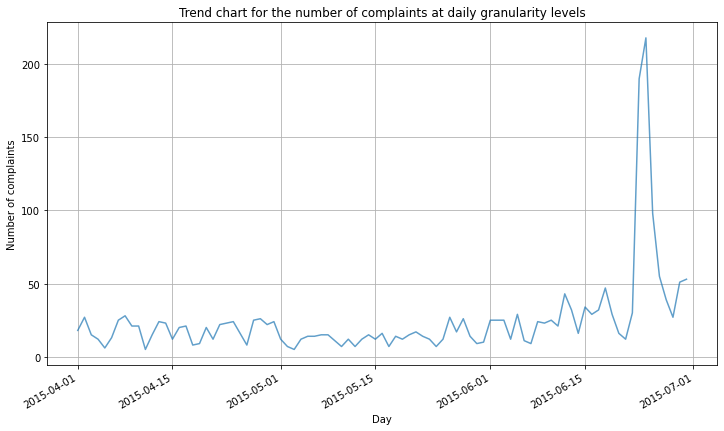

In [11]:
plt.figure(figsize=(12,7))
Comcast_df['Date'].value_counts().plot(kind='line',alpha=0.7)
plt.title('Trend chart for the number of complaints at daily granularity levels')
plt.xlabel('Day')
plt.ylabel('Number of complaints')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

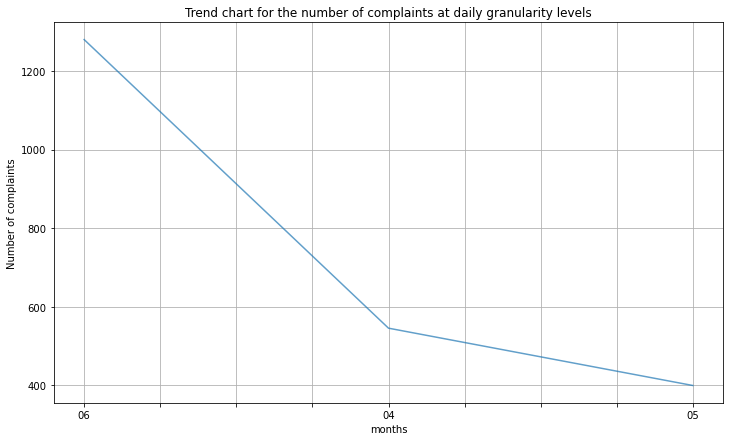

In [12]:
plt.figure(figsize=(12,7))
Comcast_df['month'].value_counts().plot(kind='line',alpha=0.7)
plt.title('Trend chart for the number of complaints at daily granularity levels')
plt.xlabel('months')
plt.ylabel('Number of complaints')
plt.grid()
plt.show()

In [13]:
Comcast_df['Customer Complaint'] = Comcast_df['Customer Complaint'].str.title() 
CT_freq = Comcast_df['Customer Complaint'].value_counts()
CT_freq


Comcast                                              102
Comcast Data Cap                                      30
Comcast Internet                                      29
Comcast Data Caps                                     21
Comcast Billing                                       18
                                                    ... 
Another Fraudulenct Collection Claim From Comcast      1
Terrible Customer Service From Comcast                 1
Comcast Data Threshold                                 1
Continuing Overcharges                                 1
Comcast Internet Service Provider                      1
Name: Customer Complaint, Length: 1740, dtype: int64

In [14]:
import nltk
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [15]:
from wordcloud import WordCloud, STOPWORDS
common_complaints = Comcast_df['Customer Complaint'].dropna().tolist()
common_complaints =''.join(common_complaints).lower()

list_stops = ('Comcast','Now','Company','Day','Someone','Thing','Also','Got','Way','Call','Called','One','Said','Tell')

for word in list_stops:
    STOPWORDS.add(word)

In [16]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=1000).generate(common_complaints)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

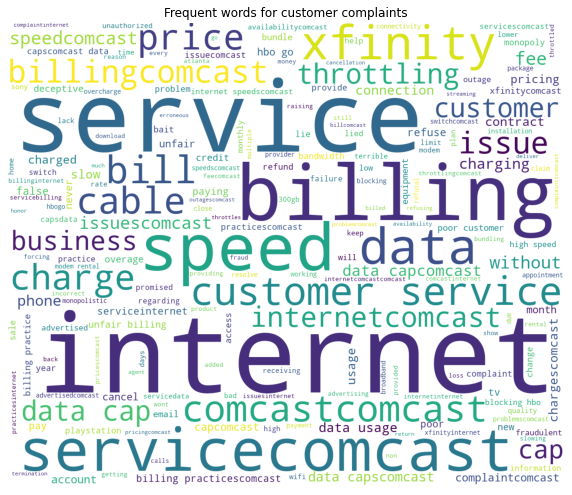

In [17]:
plt.figure( figsize=(10,12) )
plt.imshow(wordcloud)
plt.title('Frequent words for customer complaints')
plt.axis('off')
plt.show()
#Internet complaints are Maximum

In [18]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [19]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [21]:
doc_complete = Comcast_df['Customer Complaint'].tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]

In [22]:
# pip install gensim

In [23]:
# from gensim import corpora

In [24]:
# dictionary = corpora.Dictionary(doc_clean)
# dictionary

In [25]:
# doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
# doc_term_matrix

In [26]:
# from gensim.models import LdaModel

In [27]:
# num_topic = 9
# ldamodel = LdaModel(doc_term_matrix,num_topics=num_topic,id2word = dictionary,passes=10)


In [28]:
# topics = ldamodel.show_topics()
# for topic in topics:
#     print(topic)
#     print()

In [29]:
# word_dict = {}
# for i in range(num_topic):
#     words = ldamodel.show_topic(i,topn = 20)
# #     word_dict['Topic '+"{}".format(i)]=[i[0] for i in words]

In [30]:
# pd.DataFrame(word_dict)

In [31]:
Comcast_df['Highlevel_Status'] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in Comcast_df["Status"]]

In [32]:
Comcast_df['Highlevel_Status'].unique()

array(['Closed', 'Open'], dtype=object)

In [33]:
Comcast_df['State'] = Comcast_df['State'].str.title() 
st_cmp = Comcast_df.groupby(['State','Highlevel_Status']).size().unstack().fillna(0)

In [34]:
st_cmp

Highlevel_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,15.0,2.0
Florida,201.0,39.0


<IPython.core.display.Javascript object>

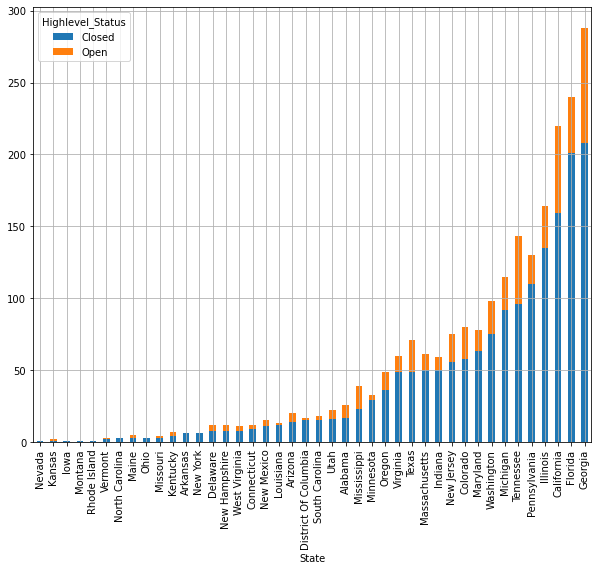

In [35]:
st_cmp.sort_values('Closed',axis = 0,ascending=True).plot(kind="bar", figsize=(10,8), stacked=True);
plt.grid()

In [36]:
Comcast_df.groupby(["State"]).size().sort_values(ascending=False).to_frame().rename({0: "Complaint count"}, axis=1)[:1]
#Georgia has highest complaints

,Complaint count
State,
Georgia,288


In [37]:
CT = Comcast_df.groupby(["State","Highlevel_Status"]).size().unstack().fillna(0)
CT.sort_values('Closed',axis = 0,ascending=False)[:1]

Highlevel_Status,Closed,Open
State,,
Georgia,208.0,80.0


In [38]:
#highest percentage of unresolved complaints
CT['Resolved_cmp_prct'] = CT['Closed']/CT['Closed'].sum()*100
CT['Unresolved_cmp_prct'] = CT['Open']/CT['Open'].sum()*100

In [39]:
CT.sort_values('Unresolved_cmp_prct',axis = 0,ascending=False)[:1]
#Georgia state has highest Unresolved complaints when compared to other states 


Highlevel_Status,Closed,Open,Resolved_cmp_prct,Unresolved_cmp_prct
State,,,,
Georgia,208.0,80.0,12.18512,15.473888


In [40]:
cr = Comcast_df.groupby(['Received Via','Highlevel_Status']).size().unstack().fillna(0)
cr['resolved'] = cr['Closed']/cr['Closed'].sum()*100
cr['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64